In [1]:
#Import libraries
import pandas as pd 
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [31]:
conda config --add channels conda-forge


Note: you may need to restart the kernel to use updated packages.


In [32]:
conda install python-kaleido

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\33615\anaconda3

  added / updated specs:
    - python-kaleido


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38haa244fe_0         3.1 MB  conda-forge
    kaleido-core-0.1.0         |       h8ffe710_0        49.4 MB  conda-forge
    python-kaleido-0.1.0       |     pyhd8ed1ab_0          13 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        52.5 MB

The following NEW packages will be INSTALLED:

  kaleido-core       conda-forge/win-64::kaleido-core-0.1.0-h8ffe710_0
  python-kaleido     conda-forge/noarch::python-kaleido-0.1.0-pyhd8ed1ab_0
  python_abi         conda-forge/win-64::python_abi-3.8-1_cp3

In [40]:
conda install -c plotly plotly-orca

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\33615\anaconda3

  added / updated specs:
    - plotly-orca


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    plotly-orca-1.3.1          |                1        56.8 MB  plotly
    ------------------------------------------------------------
                                           Total:        56.8 MB

The following NEW packages will be INSTALLED:

  plotly-orca        plotly/win-64::plotly-orca-1.3.1-1




plotly-orca-1.3.1    | 56.8 MB   |            |   0% 
plotly-orca-1.3.1    | 56.8 MB   | ########## | 100% 
plotly-orca-1.3.1    | 56.8 MB   | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done



In [41]:
#Import the database
database = "Universites.db"
connection = sql.connect(database)

In [42]:
query = '''SELECT * FROM URanking'''

In [43]:
df = pd.read_sql_query(query,connection)
df.head()

,Rank_2020,Rank_2019\r\n,Institution_Name,Country,Classification,Focus,Research_intensity,Age,Status,Academic_Reputation,...,Employer_Reputation_Rank,Faculty_Student,Faculty_Student_Rank,Citations_per_Faculty,Citations_Rank,International_Faculty,International_Faculty_Rank,International_Student,International_Student_Rank,Overall_Score
0,1,1,Massachusetts Institute of Technology (MIT),USA,M,CO,VH,5.0,B,100,...,4,100,15,99.8,7,100,43,94.1,87,100
1,2,2,Stanford University,USA,L,FC,VH,5.0,B,100,...,5,100,12,98.6,13,99.8,62,67.7,196,98.4
2,3,3,Harvard University,USA,L,FC,VH,5.0,B,100,...,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4
3,4,5,University of Oxford,GBR,L,FC,VH,5.0,A,100,...,3,100,8,84.7,45,99.7,64,98.5,50,97.2
4,5,4,California Institute of Technology (Caltech),USA,S,CO,VH,5.0,B,97.8,...,74,100,4,100,4,99.4,72,87.3,121,96.9


In [44]:
conn = sql.connect(database)

In [45]:
Top100 = pd.read_sql('''
SELECT Rank_2020, Institution_Name, Country
FROM URanking
WHERE Rank_2020 IS NOT NULL
ORDER BY Rank_2020
LIMIT 100;''',conn)
Top100

,Rank_2020,Institution_Name,Country
0,1,Massachusetts Institute of Technology (MIT),USA
1,2,Stanford University,USA
2,3,Harvard University,USA
3,4,University of Oxford,GBR
4,5,California Institute of Technology (Caltech),USA
...,...,...,...
95,96,The University of Nottingham,GBR
96,97,University of Southampton,GBR
97,98,Boston University,USA
98,98,"KTH, Royal Institute of Technology",SWE


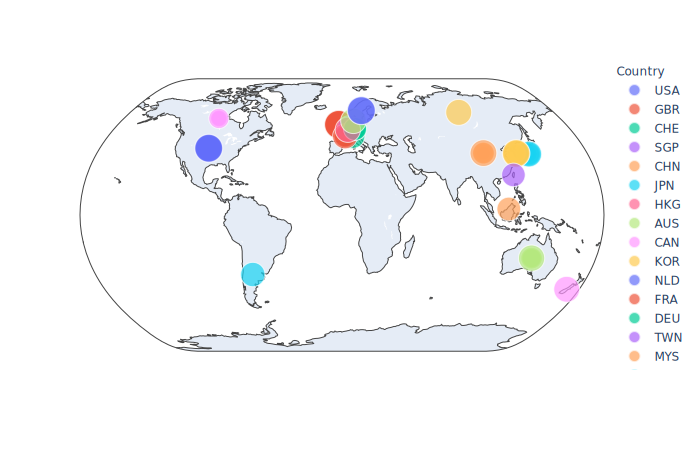

In [46]:
fig = px.scatter_geo(Top100, locations="Country", color="Country",
                     hover_name="Institution_Name", size="Rank_2020",
                     projection="natural earth")
fig.show("svg")


In [10]:
Top60 = pd.read_sql('''
SELECT Rank_2020, Institution_Name, Country, Employer_Reputation, Academic_Reputation, Overall_Score
FROM URanking
WHERE Rank_2020 IS NOT NULL
ORDER BY Rank_2020
LIMIT 60;''',conn)
Top60

,Rank_2020,Institution_Name,Country,Employer_Reputation,Academic_Reputation,Overall_Score
0,1,Massachusetts Institute of Technology (MIT),USA,100.0,100.0,100.0
1,2,Stanford University,USA,100.0,100.0,98.4
2,3,Harvard University,USA,100.0,100.0,97.4
3,4,University of Oxford,GBR,100.0,100.0,97.2
4,5,California Institute of Technology (Caltech),USA,81.2,97.8,96.9
5,6,ETH Zurich (Swiss Federal Institute of Technol...,CHE,96.7,98.4,95.9
6,7,University of Cambridge,GBR,100.0,100.0,95.0
7,8,UCL (University College London),GBR,98.7,99.3,94.8
8,9,Imperial College London,GBR,99.9,98.6,94.1
9,10,University of Chicago,USA,93.7,99.5,92.0


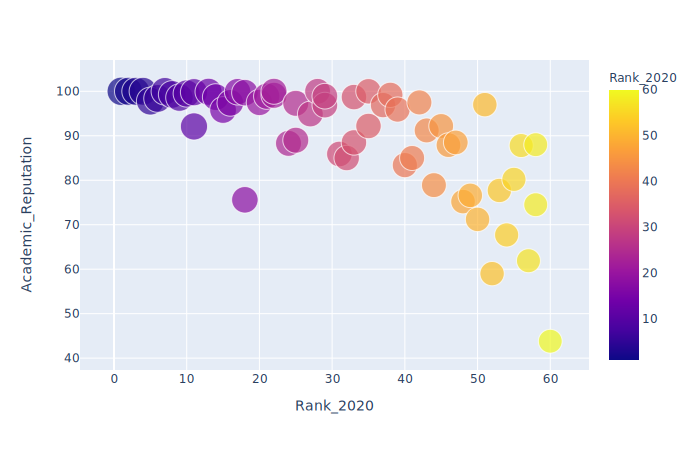

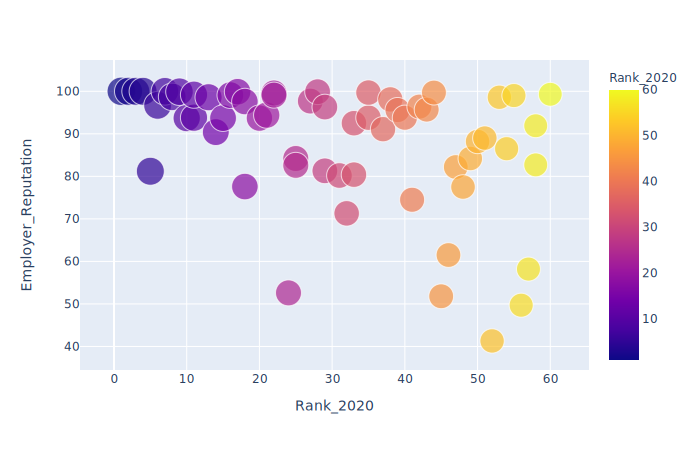

In [48]:
fig = px.scatter(Top60, x="Rank_2020", y="Academic_Reputation", color="Rank_2020",size = 'Overall_Score',
                  hover_data=['Institution_Name','Rank_2020','Employer_Reputation'])
fig2 = px.scatter(Top60, x="Rank_2020", y="Employer_Reputation", color="Rank_2020",size = 'Overall_Score',
                  hover_data=['Institution_Name','Rank_2020','Academic_Reputation'])

fig.show('svg')
fig2.show('svg')

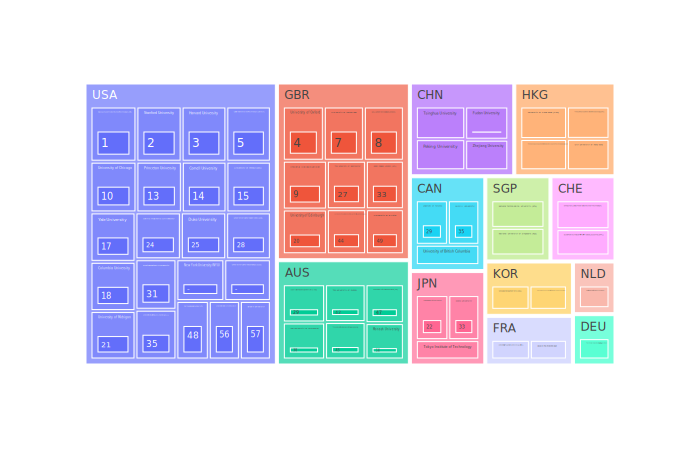

In [49]:
fig = px.treemap(Top60, path=['Country', 'Institution_Name', 'Rank_2020'], values='Overall_Score')
fig.show('svg')

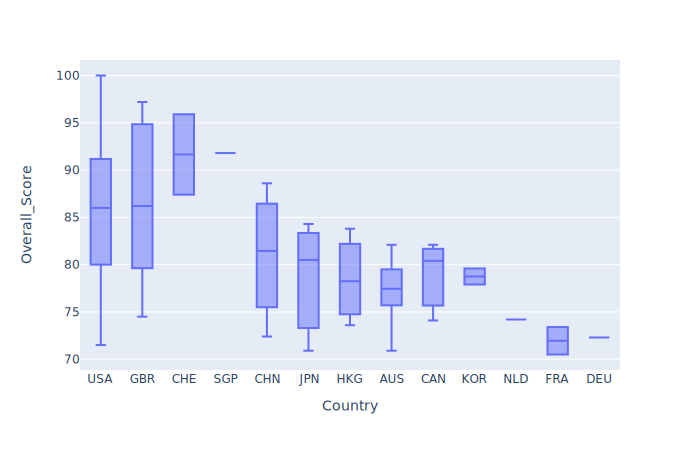

In [50]:
fig = px.box(Top60, x="Country", y="Overall_Score")
fig.show('svg')